# ANLP 2021 - Assignment 1


*Yerkezhan Abdullayeva

<div class="alert alert-block alert-danger">Due: Monday, November 29</div>

<div class="alert alert-block alert-info">

**NOTE**

Please first fill in your name and id number at the top of the assignment, and **rename** the assignment file to **yourlastname-anlp-1.ipynb**<br><br>
Problems and questions are given in blue boxes like this one. All grey and white boxes must be filled by you (they either require code or a (brief!) discussion). <br><br>
Please hand in your assignment by the deadline via Moodle upload. In case of questions, you can reach us via the piazza forum, or by email.<br><br>
<b>For this assignment, do NOT use any external packages (NLTK or any others) EXCEPT where specified.</b>
</div>

<div class="alert alert-block alert-info">
In this assignment, you will implement and work with a Naive Bayes classifier. (Note that for this exercise, you don't need to represent the input as a vector necessarily. You can directly look at the presence of words, and look up the class conditional likelihood.)
<br>
<br>
We will use a Twitter dataset classified into "hate speech" and "non hate speech" (in our data, we have called these classes "offensive" and "nonoffensive" to avoid the charged and inaccurate term "hate speech"). First, load the data (we have provided the function for this):
</div>

In [2]:
import csv
import json
from nltk.tokenize import TweetTokenizer

def read_hate_tweets (annofile, jsonfile):
    """Reads in hate speech data."""
    all_data = {}
    annos = {}
    with open(annofile) as csvfile:
        csvreader = csv.reader(csvfile, delimiter=',')
        for row in csvreader:
            if row[0] in annos:
                # if duplicate with different rating, remove!
                if row[1] != annos[row[0]]:
                    del(annos[row[0]])
            else:
                annos[row[0]] = row[1]

    tknzr = TweetTokenizer()
                
    with open(jsonfile) as jsonfile:
        for line in jsonfile:
            twtjson = json.loads(line)
            twt_id = twtjson['id_str']
            if twt_id in annos:
                all_data[twt_id] = {}
                all_data[twt_id]['offensive'] = "nonoffensive" if annos[twt_id] == 'none' else "offensive"
                all_data[twt_id]['text_tok'] = tknzr.tokenize(twtjson['text'])

    # split training and test data:
    all_data_sorted = sorted(all_data.items())
    items = [(i[1]['text_tok'],i[1]['offensive']) for i in all_data_sorted]
    splititem = len(all_data)-3250
    train_dt = items[:splititem]
    test_dt = items[splititem:]
    print('Training data:',len(train_dt))
    print('Test data:',len(test_dt))

    return(train_dt,test_dt)

In [3]:
TWEETS_ANNO = 'NAACL_SRW_2016.csv'
TWEETS_TEXT = 'NAACL_SRW_2016_tweets.json'

(train_data,test_data) = read_hate_tweets(TWEETS_ANNO,TWEETS_TEXT)

Training data: 12896
Test data: 3250


<div class="alert alert-block alert-info">
Each item in our data consists of a tuple of the tweet text and its label (represented as a string). The tweet text has been tokenized and is represented as a list of words. We can look at an example item:
</div>

In [63]:
print(train_data[4387])

(['At', 'this', 'rate', ',', "I'm", 'going', 'to', 'be', 'making', 'slides', 'for', 'a', 'keynote', 'in', 'my', 'car', 'as', 'I', 'drive', 'home', '.'], 'nonoffensive')


## Problem 1: Evaluation [15 pts]

<div class="alert alert-block alert-info">

The first thing you're being asked to do is to provide evaluation functions for a classifier and a given labelled test set. Assume that the classifier has a `predict()` function that takes an item in the form of a list as above and predicts a class for that item. Write evaluation functions to compute the `accuracy` and `f_1` score for such a classifier. (To test your functions without having access to a real `predict()` function, you could simulate one that makes random predictions.)

</div>

In [4]:
#Accurac89y evb,aluates how many data points are predicted correctly.

def accuracy(classifier, data):
    true_Y1=[]
    for element in data:
        true_Y1.append(element[1])        
#We create a variable to put all of the true values in it.

    predicted_Y1=[]
    for element in data:
        predicted_Y1.append(classifier.predict(element[0]))
    truely_predicted1 = 0 
#if the label is truly assigned and the prediciton was right,then we add it into newly created 'truely_predicted' list. 
    for element in range(0, len(true_Y1)): 
        if list(true_Y1[element])==list(predicted_Y1[element]):
            truely_predicted1+= 1
            
#Accuracy = (correctly predicted class / total testing class) × 100%;
#The numerical value of accuracy represents the proportion of true positive results (both true positive and true negative) 
    accuracy_1 = truely_predicted1 / len(true_Y1)*100
    return accuracy_1




#F-1 score provides a single score that balances both the concerns of precision and recall in one number.

def f_1(classifier, data):
    true_Y2=[]
    for element in data:
        true_Y2.append(element[1])
    
    predicted_Y2=[]
    for element in data:
        predicted_Y2.append(classifier.predict(element[0]))
#The number of correct and incorrect predictions are summarized with count values and broken down by each class
    tp=0 #true positive
    tn=0 #true negative
    fp=0 #false positive
    fn=0 #false negative
    
    for element in range(0, len(true_Y2)):
        if predicted_Y2[element] == 'offensive':
            if true_Y2[element] == 'offensive':
                tp += 1
            else:
                fp += 1
                
        elif predicted_Y2[element] == 'nonoffensive':
            if true_Y2[element] == 'nonoffensive':
                tn += 1
            else:
                fn += 1
#Precision  calculates the ratio of correctly predicted positive examples divided by the total number of positive examples that were predicted.           
    precision = tp / (tp + fp) 
#Recall calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive).
    recall = tp / (tp + fn) 
    F1_score = (2 * precision * recall / (precision + recall))*100
# We need F1 Score because we want to seek a balance between Precision and Recall.It is a trade off between 2 measurements.
    
    return F1_score


## Problem 2: Naive Bayes Classifier [35 pts]

<div class="alert alert-block alert-info">
Next, implement the Naive Bayes classifier from scratch using the code skeleton below and the definitions from class.<br><br>

Some requirements and notes for implementation:

<ul>
<li> You should allow for an arbitrary number of classes (in particular, you should not hard code the two classes needed for the given dataset). 
<li> The vocabulary of your classifier should be created dynamically from the training data. (The vocabulary is the set of all words that occur in the training data.).
<li> Use additive smoothing with a provided parameter k. 
<li> You may encounter unknown words at test time. Since we're not allowed to "peek" into the test set, we will implement the following simple treatment: We will assume that we don't know anything about unknown words and that in particular, their presence does not tell us anything about which class a document should be assigned to. Therefore, we will not include them in the calculation of the (log) probabilities during prediction, under the assumption that their probability does not differ hugely between the different classes (probably not a correct assumption, but the best we can do at this point). Since we don't need correct probabilities but only most likely classes, just ignore unknown words during prediction.
<li> Use log probabilities in order to avoid underflow.
</ul>

</div>

Naive Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.It is a probabilistic classifier, which means it predicts on the basis of the probability of an object

In [5]:
import math
class NaiveBayes(object): 
    
    def __init__(self, pb_of_cls, pb_of_wrd_class):
        self.pb_of_cls = pb_of_cls
        self.pb_of_wrd_class = pb_of_wrd_class
        pass

    
    def predict(self, x):
        probability_document_class = {}
        
        for element in self.pb_of_cls:
            one_pb_of_cls = math.log(self.pb_of_cls[element]) 
            for word in x: 
                if word in self.pb_of_wrd_class: 
                    one_pb_of_cls += math.log(self.pb_of_wrd_class[word][element])
                    #np
                else:
                    pass         
            probability_document_class[element] = one_pb_of_cls
                   
        Arg_max = max(probability_document_class, key=probability_document_class.get)
        # search how to get the index of the maximum value in a list   
        return Arg_max
        
    @classmethod
    def train(cls, data, k=1):
        sum_of_classes = {}
        pb_of_wrd_class = {}
        pb_of_cls = {}
        vocabulary =  []
        
    
        for element in data: 
            if element[1] in sum_of_classes:
                sum_of_classes[element[1]] += 1 
            else:
                sum_of_classes[element[1]] = 1
        
        
        for element in sum_of_classes:
            prob = sum_of_classes[element] / len(data) 
            pb_of_cls[element] =  prob
        txt_cls = {c1ass: [] for c1ass in pb_of_cls}
        
        for element in data:
            txt_cls[element[1]].extend(element[0])
       
        
        for element in txt_cls:
            vocabulary.extend(txt_cls[element])
            
        individual = list(set(vocabulary)) 
        
         
        
        for word in individual:
            cls_of_wrd = {} 
            for c1ass in txt_cls:
                cls_of_wrd[c1ass] = (txt_cls[c1ass].count(word) + k) / (len (txt_cls[c1ass]) + k * len(individual))
            pb_of_wrd_class[word] = cls_of_wrd
        
        return cls(pb_of_cls, pb_of_wrd_class)

<div class="alert alert-block alert-info">
Evaluate your classifier by training and testing it on the given data. Vary the smoothing parameter k. What happens when you decrease k? Plot a graph of the accuracy and/or f-score given different values of k. Discuss your findings.</div>

In [5]:
nb = NaiveBayes.train(train_data)
print("Accuracy: ",accuracy(nb, test_data))
print("F_1: ", f_1(nb,test_data))
# TODO: test further smoothing parameters

Accuracy:  85.72307692307692
F_1:  51.56576200417536


Text(0.5, 1.0, 'The change of the F-1 Score depending on smoothing')

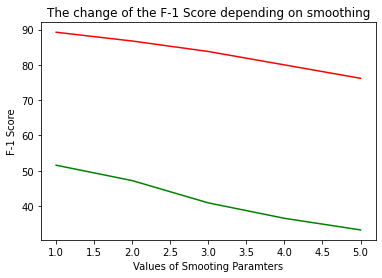

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
smoothing_k_parameters= [1,2,3,4,5]
f1_with_smoothing_train= []
f1_with_smoothing_test= []
for k_value in smoothing_k_parameters:
    nb = NaiveBayes.train(train_data, k = k_value)
    f1_with_smoothing_test.append(f_1(nb, test_data))
    f1_with_smoothing_train.append(f_1(nb, train_data))
plt.plot(smoothing_k_parameters, f1_with_smoothing_test, label = "testing,F_1",color='green')
plt.plot(smoothing_k_parameters, f1_with_smoothing_train, label = "training,F_1",color='red')
plt.xlabel("Values of Smooting Paramters")
plt.ylabel('F-1 Score')
plt.title("The change of the F-1 Score depending on smoothing")

Text(0.5, 1.0, 'The change of the Accuracy depending on smoothing')

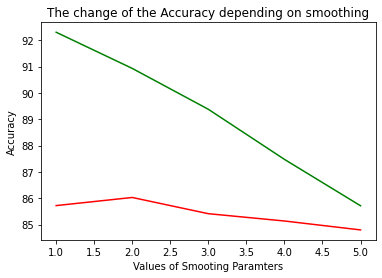

In [10]:
smoothing_k_parameters2 = [1,2,3,4,5]
accuracy_with_smoothing_train= []
accuracy_with_smoothing_test= []
for k_value in smoothing_k_parameters2:
    nb = NaiveBayes.train(train_data, k = k_value)
    accuracy_with_smoothing_train.append(accuracy(nb, test_data))
    accuracy_with_smoothing_test.append(accuracy(nb, train_data))
plt.plot(smoothing_k_parameters2, accuracy_with_smoothing_test, label = "testing,F_1",color='green')
plt.plot(smoothing_k_parameters2, accuracy_with_smoothing_train, label = "training,F_1",color='red')
plt.xlabel("Values of Smooting Paramters")
plt.ylabel('Accuracy')
plt.title("The change of the Accuracy depending on smoothing")

Text(0.5, 1.0, 'The change of the Accuracy depending on smoothing')

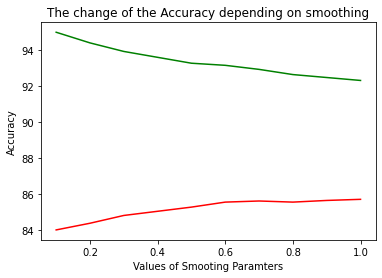

In [16]:
#What happens when you decrease k?
smoothing_k_parameters3 = [0.1,0.2,0.3,0.5,0.6,0.7,0.8,0.9,1]
accuracy_with_smoothing_train3= []
accuracy_with_smoothing_test3= []
for k_value in smoothing_k_parameters3:
    nb = NaiveBayes.train(train_data, k = k_value)
    accuracy_with_smoothing_train3.append(accuracy(nb, test_data))
    accuracy_with_smoothing_test3.append(accuracy(nb, train_data))
plt.plot(smoothing_k_parameters3, accuracy_with_smoothing_test3, label = "testing,F_1",color='green')
plt.plot(smoothing_k_parameters3, accuracy_with_smoothing_train3, label = "training,F_1",color='red')
plt.xlabel("Values of Smooting Paramters")
plt.ylabel('Accuracy')
plt.title("The change of the Accuracy depending on smoothing")

In [13]:
nb_with2 = NaiveBayes.train(train_data, k=2)
print("Accuracy of test: ",accuracy(nb_with2, test_data))
print("F_1 of test data: ", f_1(nb_with2,test_data))
#Accuracy:  85.72307692307692
#F_1:  51.56576200417536'
print('As we can see,if we change the k-value to 2,then the accuracy becomes better(from 85.03 to 86.72).However,in this scenario the F-1 score goes worse from 51.56 to 47.20 ')

Accuracy of test:  86.03076923076924
F_1 of test data:  47.20930232558139
As we can see,if we change the k-value to 2,then the accuracy becomes better(from 85.03 to 86.72).However,in this scenario the F-1 score goes worse from 51.56 to 47.20 


## Problem 3: Feature Engineering [20 pts]

<div class="alert alert-block alert-info">

We mentioned that the Naive Bayes classifier can be used with many different feature types. Try to improve on the basic bag of words model by changing the feature list of your model. Implement at least two variants. For each, explain your motivation for this feature set, and test the classifier with the given data. Briefly discuss your results!<br><br> 
Ideas for feature sets that were mentioned in class include:

<ul>
<li> removing stop words or frequent words
<li> stemming or lemmatizing (you can use NLTK or spacy.io for basic NLP operations on the texts)
<li> introducing part of speech tags as features (how?)
<li> bigrams
</ul>

</div>

I decided to check how each mehtod of preprocessing would behave and how the Accuracy and F-score.As we have the pretrained data which contains words and all of preprocessing methods could suit.

# 1.Removing stop words.
On removing stopwords, dataset size decreases and the time to train the model also decreases. Removing stopwords can potentially help improve the performance as there are fewer and only meaningful tokens left.

In [16]:
#Removing stop words.

import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
 

def reduce_stopwords(data):
    reduced_stopwords=[]
    for word in data:
        if word not in stop_words:
            reduced_stopwords.append(word)
        else:
            pass
    return reduced_stopwords


reduce_stopwords_train = list((reduce_stopwords(data), element) for data, element in train_data)
nb_stopwords = NaiveBayes.train(reduce_stopwords_train)
reduce_stopwords_test = list((reduce_stopwords(data), element) for data, element in test_data)
print("Accuracy: ",accuracy(nb_stopwords,reduce_stopwords_test ))
print("F_1: ", f_1(nb_stopwords,reduce_stopwords_test))
#As you can see the accuracy and F-1 score have not changed much,here there are previous results without preprocessing:
#Accuracy:  85.72307692307692
#F_1:  51.56576200417536

Accuracy:  86.06153846153846
F_1:  53.056994818652846


# 2.Stemming.
A stemmer will return the stem of a word, which needn't be identical to the morphological root of the word. It usually sufficient that related words map to the same stem,even if the stem is not in itself a valid root, while in lemmatisation, it will return the dictionary form of a word, which must be a valid word.

In [39]:
from nltk.stem.snowball import SnowballStemmer
stemmed_text=[]
stemmer_built_in= SnowballStemmer("english")
def stemmer(data):
    for element in data:
        document_stem = []
        for word in element[0]:
            document_stem.append(stemmer_built_in.stem(word))
        stemmed_text.append((document_stem,element[1]))
        
    return stemmed_text

stemmed_train_data=stemmer(train_data)
stemmed_test_data=stemmer(test_data)
nb_stemming=NaiveBayes.train(stemmed_train_data)
print("Accuracy: ",accuracy(nb_stemming,stemmed_test_data))
print("F_1: ", f_1(nb_stemming,stemmed_test_data))

Accuracy:  89.41533506750898
F_1:  83.35119337554798


# 3.Lemmatisation
In lemmatisation, the part of speech of a word should be first determined and the normalisation rules will be different for different part of speech, while the stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech.
Reference: http://textminingonline.com/dive-into-nltk-part-iv-stemming-and-lemmatization

In [42]:
from nltk.stem import WordNetLemmatizer 
lemmitized_text = []
lemmitizer_built_in=WordNetLemmatizer()
def lemmatizer(data):
    for element in data:
        document_lemmatized = []
        for word in element[0]:
            document_lemmatized.append(lemmitizer_built_in.lemmatize(word))
        lemmitized_text.append((document_lemmatized,element[1]))
    return lemmitized_text

lemmitized_train_data=lemmatizer(train_data)
lemmitized_test_data=lemmatizer(test_data)
nb_lemmatization=NaiveBayes.train(stemmed_train_data)
print("Accuracy: ",accuracy(nb_lemmatization,lemmitized_test_data))
print("F_1: ", f_1(nb_lemmatization,lemmitized_test_data))

Accuracy:  84.33048433048434
F_1:  71.53465346534654


# 4.Introducing part of speech tags as features.
It is a process of converting a sentence to forms – list of words, list of tuples (where each tuple is having a form (word, tag)). The tag in case of is a part-of-speech tag, and signifies whether the word is a noun, adjective, verb, and so on.

In [49]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yerkesoul/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

Averaged Perceptron Tagger is used for tokenising sentences and averaged_perceptron_tagger is used for tagging words with their parts of speech (POS)

In [58]:
POS_tagging_1 = []
POS_tagging_2 = []
def POS_tagger(data):    
    for element in data:
        tagged = nltk.pos_tag(element[0])
        POS_tagging_1.append((tagged, element[1]))
    
    for word in POS_tagging_1:
        tags = []
        for element in word[0]:
            tags.append(element[0] + ',' + element[1])
    
        POS_tagging_2.append((tags, word[1]))
        
    return POS_tagging_2

pos_tagged_train = POS_tagger(train_data)
pos_tagged_test = POS_tagger(test_data)
nb_pos_tagged = NaiveBayes.train(pos_tagged_train)
print("Accuracy: ",accuracy(nb_pos_tagged,pos_tagged_test))
print("F_1: ", f_1(nb_pos_tagged,pos_tagged_test))

Accuracy:  93.88127539425659
F_1:  90.88764678734424


Conclusion:
From all of the pre-processing steps the Part of speech tagging showed the best results.Accuracy becoming better from the 85.72307692307692 to 93.88127539425659 and the improvement of the F_1 score from 51.56576200417536 to 90.88764678734424.

## Problem 4: Logistic Regression Classifier [30 pts]

<div class="alert alert-block alert-info">
    
Implement a logistic regression classifier using the definitions given in class and gradient descent. For this, you will have to use a matrix representation for your data to keep track of each feature's weights per class, which you can implement using the `numpy` package. <br><br> 
Start by implementing a function `featurize()` that converts the (training or testing) data into a matrix format. This function should return a pair of NumPy matrices 𝑿, 𝒀, where 𝑿 is an 𝑁 × 𝐹 matrix (𝑁: number of data instances, 𝐹: number of features), and where 𝒀 is an 𝑁 × 2 matrix whose rows have one of two forms:<br><br>
[1, 0] if the gold-standard annotation class for the corresponding tweet is ‘offensive’, or <br><br>
[0, 1] if the gold-standard class for the corresponding document is ‘nonoffensive’<br><br>
This kind of representation is known as a one-hot encoding. You can read the first vector as saying that ‘there is a 100% chance that the instance belongs to the “offensive” class and a 0% chance that it belongs to the “nonoffensive” class’, and similarly for the second vector. Note that these are the two extreme cases for the conditional probability distribution P(k|x) for class k and feature vector x.<br><br>
To implement the `featurize()` function, you will need to assign to each word in the training set a unique integer index which will identify that component of the feature vector which is 1 if the corresponding word is present in the document, and 0 otherwise. This index is built by the helper function `build_w2i()`.<br><br>
Your next task is to complete the implementation of the `LogReg` class. The methods `p()` and `predict()` yield the probability of a class given an item, and the best class for the item, respectively. They can be implemented using appropriate NumPy matrix operations and the provided `softmax()` function. Note that you should set up both methods to take a whole matrix of input vectors as input, not just a single vector.<br><br>
The training procedure is implemented in the (class) method `train()`, using iterative optimization. Typically, we shuffle the training data and split them into mini-batches (e.g, 100 items), then update the weights after each minibatch. This is done for `max_iter` number of iterations, or "epochs". Each epoch iterates over the training data set once.<br><br>
Implement the missing methods using l_2 regularization with parameter C=0.1

</div>

In [ ]:
import numpy as np

class LogReg:
    def __init__(self, eta=0.01, num_iter=30):
        self.eta = eta
        self.num_iter = num_iter
    
    def softmax(self, inputs):
        """
        Calculate the softmax for the give inputs (array)
        :param inputs:
        :return:
        """
        return np.exp(inputs) / float(sum(np.exp(inputs)))
    
    def train(self, X, Y):

        # weights initialization
        self.weights = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            # TODO: Fill in iterative updating of weights
            pass
        return None
    
    def p(self, X): 
        # TODO: Fill in (log) probability prediction
        return 0.0
    
    def predict(self, X):
        # TODO: Replace next line with prediction of best class
        return None

<div class="alert alert-block alert-info">
Test your implementation using 10 iterations, default learning rate eta, and l_2 regularization with parameter C=0.1.
</div>